<a href="https://colab.research.google.com/github/rb4050/Deep-learning/blob/main/Multiclass_classification_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass classificaation with Keras

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Data Ingestion

In [2]:
import pandas as pd

In [3]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv


In [4]:
df = pd.read_csv(url1)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


# Target is weather type

# step 2 = Data quality check

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [7]:
df.columns


Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [8]:
df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [9]:
df['Weather Type'].value_counts()

,count
Weather Type,
Rainy,3300
Cloudy,3300
Sunny,3300
Snowy,3300


<Axes: xlabel='Weather Type'>

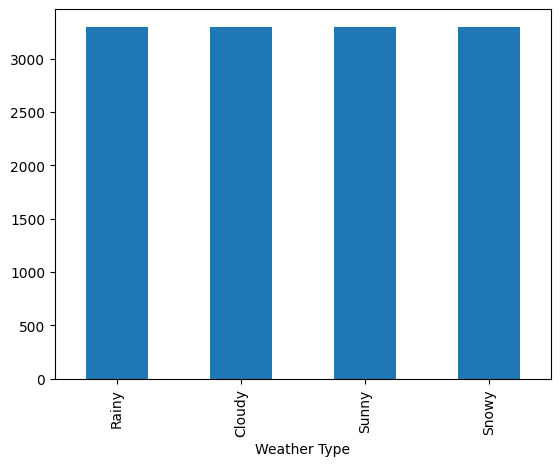

In [10]:
df['Weather Type'].value_counts().plot(kind='bar')

In [11]:
df.duplicated().sum()

np.int64(0)

# Step 3 = Sep x and y(weather type)

In [12]:
x=df.drop(columns=["Weather Type"])
y=df["Weather Type"]

In [13]:
x.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [14]:
y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


# Pre process both x and  y coz multiclass classification = only in multiclass

In [15]:
cat = list(x.columns[x.dtypes=="object"])
con = list(x.columns[x.dtypes!="object"])

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer


In [17]:
cat

['Cloud Cover', 'Season', 'Location']

In [22]:
con

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

In [18]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()

)

In [23]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False,drop="first")
)

In [24]:
pre = ColumnTransformer(
    [
        ("num",num_pipe,con),
        ("cat",cat_pipe,cat)
    ]
).set_output(transform="pandas")

In [25]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [26]:
x_pre = pre.fit_transform(x)

In [27]:
x_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# # Only in multiclass classification problem u need to onehotencoded target feature

In [31]:
y_pre = pd.get_dummies(y,dtype="int")

In [32]:
y_pre

,Cloudy,Rainy,Snowy,Sunny
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
13195,0,1,0,0
13196,0,0,1,0
13197,1,0,0,0
13198,0,0,1,0


In [33]:
y_pre.head()

,Cloudy,Rainy,Snowy,Sunny
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0


In [34]:
y_pre.columns

Index(['Cloudy', 'Rainy', 'Snowy', 'Sunny'], dtype='object')

# step 5 = train test split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain , xtest , ytrain , ytest = train_test_split(x_pre,y_pre,test_size=0.2,random_state=42)

In [37]:
xtrain.shape

(10560, 15)

In [38]:
xtest.shape

(2640, 15)

In [40]:
ytrain.shape

(10560, 4)

In [41]:
ytest.shape

(2640, 4)

In [42]:
xtrain.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
3958,0.740404,-0.134243,-0.554712,1.200664,0.117804,-0.520104,-1.175461,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2239,-0.237413,1.351385,0.169040,0.105042,0.299802,-1.038715,-0.433923,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3608,0.510330,-0.530410,-0.482337,-1.334918,0.525351,1.554340,1.049153,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6848,1.603184,0.757134,5.018179,0.981540,-0.364746,-0.520104,-1.027154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6119,-0.064857,-0.134243,0.603291,-1.366221,-0.155596,-0.779410,0.752538,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [43]:
ytrain.head()

,Cloudy,Rainy,Snowy,Sunny
3958,0,1,0,0
2239,0,1,0,0
3608,0,0,0,1
6848,0,1,0,0
6119,1,0,0,0


In [44]:
ytest.head()

,Cloudy,Rainy,Snowy,Sunny
4111,0,0,0,1
10607,0,0,0,1
7372,0,0,0,1
11786,0,0,1,0
12227,0,0,0,1


In [45]:
xtest.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
4111,0.222737,-1.520829,-0.771838,-1.491435,0.412980,1.295035,1.345768,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10607,2.465964,1.252343,0.675666,0.918933,0.530728,1.554340,-0.433923,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7372,1.200553,-0.877057,-1.133714,-1.303614,0.519437,1.035729,0.752538,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
11786,-1.502823,0.509529,-0.482337,1.138057,-0.329798,-1.038715,-1.175461,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
12227,0.107699,1.252343,0.024290,1.732823,0.588257,1.813646,1.049153,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [48]:
ytrain.shape[1]

4

# step 6 = model training

In [53]:
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout
from keras.callbacks import EarlyStopping

In [54]:
model = Sequential(
    [
        Input(shape=(xtrain.shape[1],)),
        Dense(32,activation="relu"),
        Dropout(0.5),
        Dense(64,activation="relu"),
        Dropout(0.5),
        Dense(128,activation="relu"),
        Dropout(0.5),
        Dense(ytrain.shape[1],activation="softmax")
    ]


)

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,460 (44.77 KB)

 Trainable params: 11,460 (44.77 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [57]:
es = EarlyStopping(patience=5,restore_best_weights=True)

In [58]:
hist = model.fit(xtrain,ytrain,validation_split=0.2,epochs=100,callbacks=[es])

Epoch 1/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4457 - loss: 1.2208 - val_accuracy: 0.8608 - val_loss: 0.5903
Epoch 2/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7293 - loss: 0.8051 - val_accuracy: 0.8769 - val_loss: 0.4232
Epoch 3/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7953 - loss: 0.6385 - val_accuracy: 0.8816 - val_loss: 0.3493
Epoch 4/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8178 - loss: 0.5550 - val_accuracy: 0.8887 - val_loss: 0.3109
Epoch 5/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8321 - loss: 0.5053 - val_accuracy: 0.8925 - val_loss: 0.2917
Epoch 6/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8431 - loss: 0.4765 - val_accuracy: 0.8949 - val_loss: 0.2734
Epoch 7/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8434 - loss: 0.4560 - val_accuracy: 0.8963 - val_loss: 0.2660
Epoch 8/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8612 - loss: 0.4064 - val_accu

# plot learning curve

In [59]:
import matplotlib.pyplot as plt

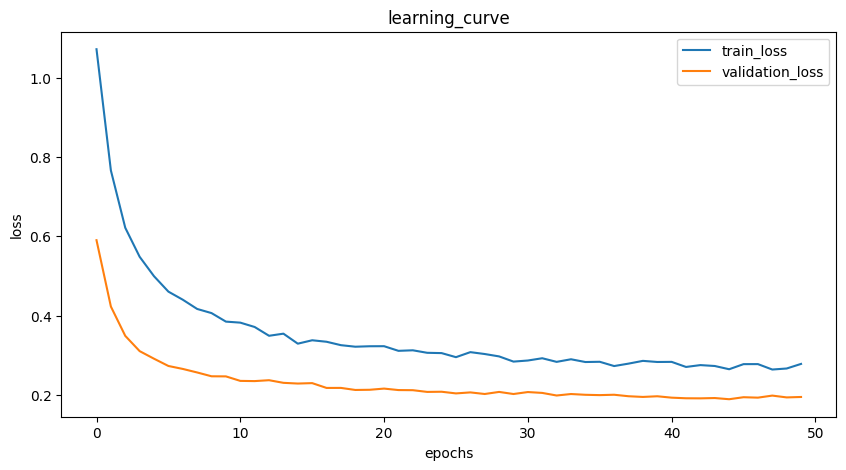

In [61]:
plt.figure(figsize=(10,5))
plt.plot(hist.history["loss"],label="train_loss")
plt.plot(hist.history["val_loss"],label="validation_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("learning_curve")
plt.legend()
plt.show()

# step 7 = model evaluation

In [62]:
model.evaluate(xtrain,ytrain)

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9069 - loss: 0.1947


[0.1920011192560196, 0.9107954502105713]

In [63]:
model.evaluate(xtest,ytest)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8979 - loss: 0.2141


[0.21324938535690308, 0.9018939137458801]

In [66]:
yprob_train = model.predict(xtrain)
yprob_train[0:5]

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.32650135e-02, 9.74456728e-01, 7.38658186e-04, 1.53953256e-03],
       [1.60376057e-02, 9.80909109e-01, 1.77000184e-03, 1.28333690e-03],
       [3.19843529e-09, 7.87592040e-12, 6.23013729e-09, 1.00000000e+00],
       [8.84165429e-03, 9.90725100e-01, 1.14016308e-04, 3.19276965e-04],
       [9.99820292e-01, 1.21666835e-05, 3.27064408e-05, 1.34898321e-04]],
      dtype=float32)

In [68]:
ypred_train_idx = yprob_train.argmax(axis=1)
ypred_train_idx[0:5]

array([1, 1, 3, 1, 0])

In [69]:
ypred_train = y_pre.columns[ypred_train_idx]
ypred_train[0:5]

Index(['Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy'], dtype='object')

In [70]:
ytrain.head()

,Cloudy,Rainy,Snowy,Sunny
3958,0,1,0,0
2239,0,1,0,0
3608,0,0,0,1
6848,0,1,0,0
6119,1,0,0,0


In [72]:
ytrain_org = ytrain.idxmax(axis=1)
ytrain_org[0:5]

,0
3958,Rainy
2239,Rainy
3608,Sunny
6848,Rainy
6119,Cloudy


In [73]:
ytest_org = ytest.idxmax(axis=1)
ytest_org[0:5]

,0
4111,Sunny
10607,Sunny
7372,Sunny
11786,Snowy
12227,Sunny


In [82]:
def predict_class(model,x):
  ypred = model.predict(x) # ypred contains the predicted probabilities
  ypred_idx = ypred.argmax(axis=1)
  ypred_class = y_pre.columns[ypred_idx] # ypred_class contains the predicted class names
  return ypred_class , ypred # Return the predicted class names and the predicted probabilities

In [84]:
ypred_test , ypred= predict_class(model,xtest)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [85]:
ytest_org.head()

,0
4111,Sunny
10607,Sunny
7372,Sunny
11786,Snowy
12227,Sunny


In [86]:
yprob_test = ypred.max(axis=1)
yprob_test[0:5]

array([0.9999999 , 0.9991947 , 0.99911374, 0.99999976, 0.41961327],
      dtype=float32)

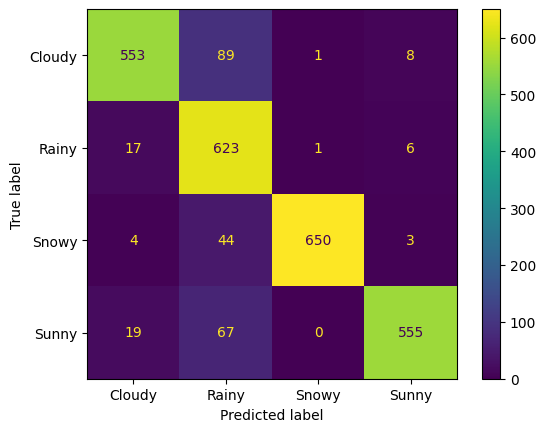

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest_org,ypred_test)

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(ytest_org,ypred_test))

              precision    recall  f1-score   support

      Cloudy       0.93      0.85      0.89       651
       Rainy       0.76      0.96      0.85       647
       Snowy       1.00      0.93      0.96       701
       Sunny       0.97      0.87      0.92       641

    accuracy                           0.90      2640
   macro avg       0.91      0.90      0.90      2640
weighted avg       0.92      0.90      0.90      2640



# from above matrix model is good and can be used for out of sample prediction


# step 8 = out of sample prediction

In [90]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_weather.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_weather.csv


In [91]:
xnew = pd.read_csv(url2)
xnew.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland


In [92]:
xnew.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),1
Cloud Cover,1
Atmospheric Pressure,0
UV Index,0
Season,2
Visibility (km),1
Location,2


In [93]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [94]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
0,-1.100192,-0.035201,0.892792,0.386773,-0.561530,-1.038715,-1.027154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5.054302,1.896115,0.748042,0.918933,0.246574,1.813646,0.455922,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.007338,0.360966,0.386166,-0.583634,0.307330,-0.001493,0.752538,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.165218,1.499948,1.254668,0.136346,0.184743,-1.038715,-0.582231,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.797923,-2.164601,-0.265211,-1.491435,0.482338,0.517118,-0.137308,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [95]:
preds , prob = predict_class(model,xnew_pre)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step


In [96]:
preds[0:5]

Index(['Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny'], dtype='object')

In [97]:
prob[0:5]

array([[6.0711773e-06, 1.2980960e-04, 9.9984848e-01, 1.5587741e-05],
       [5.2235808e-02, 1.4124808e-02, 1.3967240e-02, 9.1967213e-01],
       [9.9688846e-01, 6.6208298e-04, 7.2485168e-04, 1.7246982e-03],
       [1.6986169e-02, 9.7918051e-01, 2.3472914e-03, 1.4860253e-03],
       [1.0733531e-03, 4.8789800e-05, 4.6193541e-04, 9.9841595e-01]],
      dtype=float32)

In [103]:
xnew["Weather type"] = preds



In [104]:
xnew

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather type
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain,Snowy
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain,Sunny
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland,Cloudy
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland,Rainy
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland,Sunny
...,...,...,...,...,...,...,...,...,...,...,...
95,27,59,9.5,41.0,overcast,1001.39,4,Spring,8.0,mountain,Cloudy
96,73,82,47.0,107.0,overcast,1002.73,0,Winter,0.5,mountain,Rainy
97,2,60,3.0,70.0,overcast,994.19,0,Winter,2.0,mountain,Snowy
98,33,44,1.5,11.0,clear,1011.95,7,Summer,8.5,inland,Sunny


In [105]:
xnew['Weather type'].value_counts()

,count
Weather type,
Rainy,37
Snowy,26
Cloudy,21
Sunny,16


<Axes: xlabel='Weather type'>

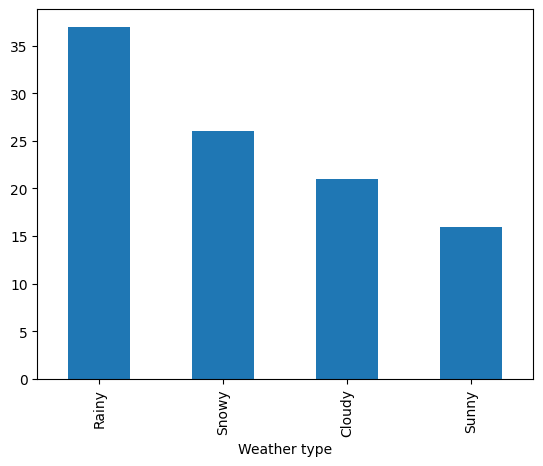

In [106]:
xnew['Weather type'].value_counts().plot(kind="bar")

In [107]:
xnew.to_csv("weatherResults.csv",index=False)

# save the model and pre processor

In [108]:
import joblib

In [109]:
joblib.dump(pre,"weather_preprocessor.joblib")

['weather_preprocessor.joblib']

In [110]:
model.save("weather_model.keras")

# load the data again

In [111]:
p=joblib.load("weather_preprocessor.joblib")

In [112]:
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [113]:
from keras.models import load_model

In [114]:
m = load_model("weather_model.keras")

In [115]:
m

<Sequential name=sequential, built=True>

In [117]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,382 (134.31 KB)

 Trainable params: 11,460 (44.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,922 (89.54 KB)